# **Important Libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

# **EDA**

In [19]:
df = pd.read_csv('CARS_1.csv')
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   reviews_count        203 non-null    int64  
 2   fuel_type            203 non-null    object 
 3   engine_displacement  203 non-null    int64  
 4   no_cylinder          203 non-null    int64  
 5   seating_capacity     202 non-null    float64
 6   transmission_type    203 non-null    object 
 7   fuel_tank_capacity   203 non-null    float64
 8   body_type            203 non-null    object 
 9   rating               203 non-null    float64
 10  starting_price       203 non-null    int64  
 11  ending_price         203 non-null    int64  
 12  max_torque_nm        203 non-null    float64
 13  max_torque_rpm       203 non-null    int64  
 14  max_power_bhp        203 non-null    float64
 15  max_power_rp         203 non-null    int

In [21]:
# Subset the features
X = df[['max_power_bhp', 'max_torque_nm', 'starting_price', 'ending_price', 'fuel_tank_capacity']]
y = df['body_type']

# **PCA Numpy Version**

In [ ]:
def pca_numpy(X):
    # Standardize data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Compute covariance matrix
    cov_mat = np.cov(X_std.T)
    
    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    
    # Sort eigenvalues and eigenvectors
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Normalize eigenvector signs (make largest absolute value positive)
    # For making the two figures the same direction
    for i in range(eigenvectors.shape[1]):
        if np.abs(eigenvectors[:, i]).max() != 0:
            eigenvectors[:, i] = eigenvectors[:, i] * np.sign(eigenvectors[np.argmax(np.abs(eigenvectors[:, i])), i])
    
    # Select top 2 components
    projection_mat = eigenvectors[:,:2]
    
    # Projection data
    X_projected = X_std @ projection_mat
    
    return X_projected

In [23]:
def plot_pca(X_projected, classes, title):
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x=X_projected[:, 0], 
        y=X_projected[:, 1], 
        hue=classes, 
        style=classes, 
        s=100, 
        palette='deep'
    )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

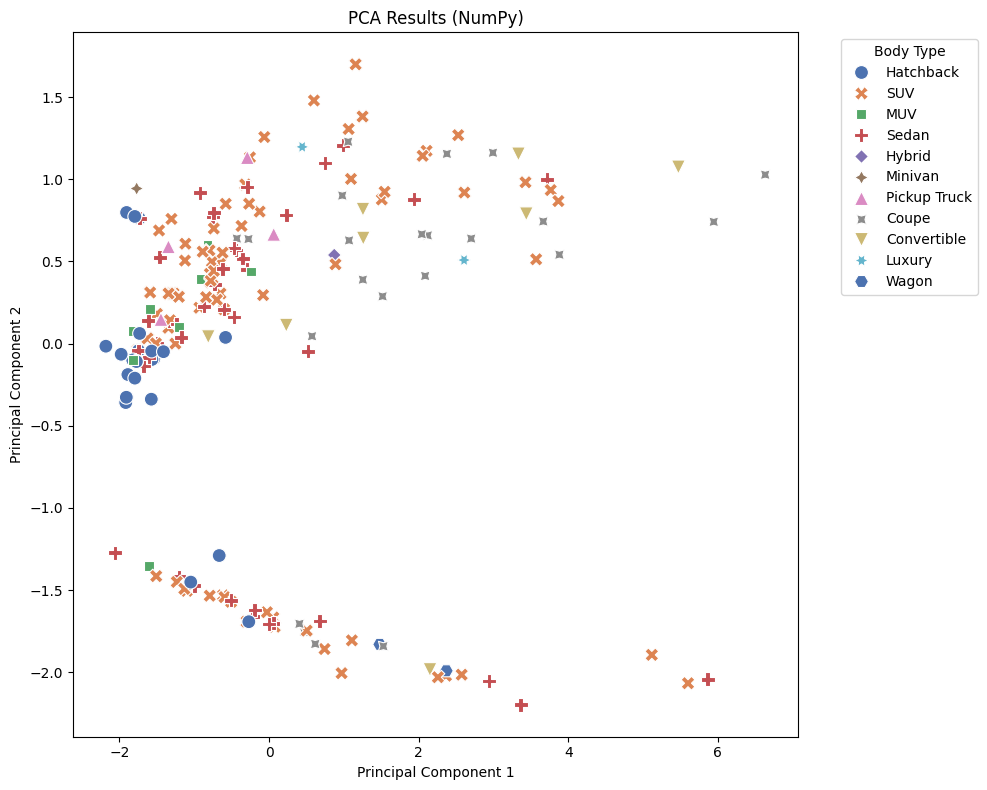

In [24]:
X_projected_np = pca_numpy(X.values.tolist())
plot_pca(X_projected_np, y, 'PCA Results (NumPy)')

# **Pure Python Version**

In [25]:
# Transpose a matrix
def transpose(mat):
    return [[row[i] for row in mat] for i in range(len(mat[0]))]

In [26]:
# Matrix multiplication
def matmul(A, B):
    res = []
    for i in range(len(A)):
        row = []
        for j in range(len(B[0])):
            val = sum(A[i][k] * B[k][j] for k in range(len(B)))
            row.append(val)
        res.append(row)
    return res

In [27]:
# Calculate column-wise mean
def column_means(mat):
    num_cols = len(mat[0])
    num_rows = len(mat)
    return [sum(row[i] for row in mat) / num_rows for i in range(num_cols)]

In [28]:
# Calculate column-wise standard deviation
def column_stds(mat, means):
    num_cols = len(mat[0])
    num_rows = len(mat)
    return [
        math.sqrt(sum((row[i] - means[i]) ** 2 for row in mat) / num_rows)
        if sum((row[i] - means[i]) ** 2 for row in mat) > 0 else 1.0
        for i in range(num_cols)
    ]

In [29]:
# Standardize the Data (Z-score)
def standardize(mat):
    means = column_means(mat)
    stds = column_stds(mat, means)
    return [[(row[i] - means[i]) / stds[i] for i in range(len(row))] for row in mat]

In [30]:
def covariance_matrix(data):
    n = len(data)
    transposed = transpose(data)
    num_features = len(transposed)
    cov_matrix = []
    for i in range(num_features):
        row = []
        for j in range(num_features):
            cov_ij = sum(transposed[i][k] * transposed[j][k] for k in range(n)) / (n - 1)
            row.append(cov_ij)
        cov_matrix.append(row)
    return cov_matrix

In [ ]:
def pca_pure_python(X):
    # Standardize data
    X_std = standardize(X)
    
    # Compute covariance matrix
    cov_matrix = covariance_matrix(X_std)
    
    # Convert to numpy for eigen decomposition
    cov_matrix_np = np.array(cov_matrix)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_np)
    
    # Sort eigenvalues and eigenvectors
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Normalize eigenvector signs
    for i in range(eigenvectors.shape[1]):
        if np.abs(eigenvectors[:, i]).max() != 0:
            eigenvectors[:, i] = eigenvectors[:, i] * np.sign(eigenvectors[np.argmax(np.abs(eigenvectors[:, i])), i])
    
    # Select top 2 components
    projection_matrix = eigenvectors[:, :2].tolist()
    
    # Project data
    X_projected = matmul(X_std, projection_matrix)
    
    return np.array(X_projected)

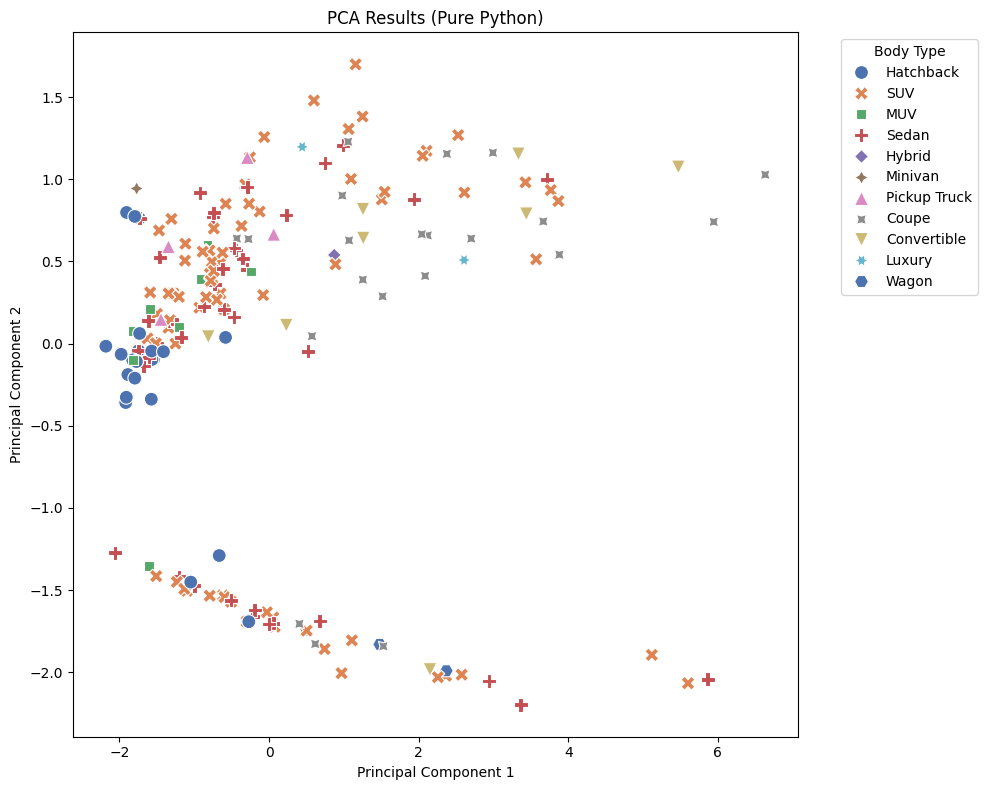

In [32]:
X_projected_pure = pca_pure_python(X.values.tolist())
plot_pca(X_projected_pure, y, 'PCA Results (Pure Python)')

# **Performance Benchmarking**

In [33]:
np_start = time.time()
X_np = pca_numpy(X.values.tolist())
np_end = time.time()
numpy_time = np_end - np_start
numpy_time

0.0008828639984130859

In [34]:
py_start = time.time()
X_pure = pca_pure_python(X.values.tolist())
py_end = time.time()
python_time = py_end - py_start
python_time

0.0035512447357177734

In [40]:
print(f"NumPy PCA Time: {numpy_time:.4f}")
print(f"Pure Python PCA Time: {python_time:.4f}")

NumPy PCA Time: 0.0009
Pure Python PCA Time: 0.0036


# **Reporting**
___
## **PCA** 
- It's an unsupervised algorithm in machine learning that's used for the number of features **(dimensionality reduction technique)**.

___
### Why is PCA Important?
1) Reducing dimensionality helps to prevent over fitting , making good generalization and Noise Reduction
2) Decreased computational complexity
3) Good visualization in the 2D and 3D

___
### **PCA vs Feature Selection**
- **Feature Selection** : Involves selecting a subset of the most relevant features from the original dataset
- **PCA** : it creates new features called principal components that are linear combinations of the original features.

___
### **How it's working**
1) Standardize the Data
2) Calculate the Covariance Matrix
3) Calculate the Eigenvalues and Eigenvectors
4) Sort the Eigenvectors
5) Select the number of Principal Components
6) Project the Data onto the Principal Components
___
- [Link of article](https://medium.com/@piyushkashyap045/understanding-principal-component-analysis-pca-e73c7810bbab)
- [I found that video useful](https://www.youtube.com/watch?v=ZgyY3JuGQY8)
___

## **The concept of eigen values & eigen vectors**
___
1) **Eigen Values**
- Eigenvalues are unique scalar values linked to a matrix or linear transformation. They indicate how much an eigenvector gets stretched or compressed during the transformation.
___
2) **Eigen Vectors**
- Eigenvectors are non-zero vectors that, when multiplied by a matrix, only stretch or shrink without changing direction
___
**Equation**:
- **Av=λv**

**where**:
- A is the matrix
- v is associated eigenvector
- λ is scalar eigenvalue
___
3) **Their applications**:
- **PCA (Principal Component Analysis):** A technique that reduces dimensionality by projecting data onto directions (principal components) that maximize variance.
- **LDA (Linear Discriminant Analysis):** A method used to reduce dimensions while preserving class separability by maximizing the ratio of between-class to within-class variance.
- **SVD (Singular Value Decomposition):** A matrix factorization method that breaks a matrix into three components (U, Σ, Vᵗ) to reveal its structure and rank.
___
- [Link of article 1](https://www.geeksforgeeks.org/engineering-mathematics/eigen-values/)
- [Link of article 2](https://medium.com/@maxbrenner-ai/eigenvalues-and-eigenvectors-in-data-science-intuition-and-applications-25dfc4a128af)
___

## **Benchmark Results**

| Method         | Time (seconds) |
|----------------|----------------|
| **NumPy**      | 0.0009         |
| **Pure Python**| 0.0036         |

### **Numpy version is more fast because:**
- Vectorized Operations
- Low-Level Implementation because it is built on C and Fortran
- Built-in parallelism numpy can automatically use multiple CPU cores at the same time.